In [1]:
# to connectto Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from numpy import save
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import seaborn as sb
from collections import Counter
import time

# For plotting
import plotly.io as plt_io
import plotly.graph_objects as go
%matplotlib inline
#PCA
from sklearn.decomposition import PCA


In [3]:
#Funcion para graficar en 2D y 3D
def plot_2d(component1, component2):
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        text="{ "+df["City"]+" : " + df["Date"]+" }",
        mode='markers',
        marker=dict(
            size=5,
            color=labels, #set color equal to a variable
            colorscale='Rainbow', # one of plotly colorscales
            showscale=False,
            line_width=1,
        
        )
    ))
    fig.update_layout(xaxis_title='Componente 1',
                    yaxis_title='Componente 2')                 
    fig.layout.template = 'seaborn'
    fig.show()

def plot_3d(component1,component2,component3):
    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        text="{ "+df["City"]+" : " + df["Date"]+" }",
        mode='markers',
        marker=dict(
            size=5,
            color=labels,                # set color to an array/list of desired values
            colorscale='Rainbow',   # choose a colorscale
            opacity=1,
            line_width=1
        )
    )])
    # tight layout
    fig.update_layout(scene = dict(xaxis_title='Componente 1',
                    yaxis_title='Componente 2',
                    zaxis_title='Componente 3'))
    fig.layout.template = 'seaborn'
    
    fig.show()

# Cargando datos

In [4]:
## Cargando cvs
path = "/content/drive/MyDrive/CURSOS UNSA/Proyecto final de tesis/Avances Proyecto/Tesis_code/"

In [5]:
## Cargando cvs
PATH = "india_2015_2020.csv"

dataset = pd.read_csv(path+PATH)
df = dataset.copy()

In [6]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,AQI_range
0,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,472.0,maroon,5
1,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,454.0,maroon,5
2,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,143.0,orange,2
3,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,319.0,purple,4
4,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,325.0,purple,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15787,Bengaluru,2020-07-01,17.50,30.48,3.95,13.25,14.83,7.42,0.54,6.66,15.40,43.0,green,0
15788,Amritsar,2020-07-01,57.67,100.99,32.81,15.11,30.20,17.73,0.59,3.48,16.48,78.0,yellow,1
15789,Amaravati,2020-07-01,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,54.0,yellow,1
15790,Jaipur,2020-07-01,58.79,103.68,5.19,10.88,14.16,17.41,0.54,5.19,53.68,70.0,yellow,1


In [7]:
#Generando 
# X_data = df.drop(columns=['City','AQI','AQI_Bucket','Benzene', 'Toluene', 'Xylene','AQI'], inplace=False)
X_data = df.drop(columns=['City','AQI','AQI_Bucket','AQI','AQI_range'], inplace=False)
X_data.set_index('Date', inplace=True)


Y_labels = df.drop(columns=['Date','City','PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','AQI','AQI_range'], inplace=False)


In [8]:
# Dividiendo los datos en Datos y etiquetas
labels = Y_labels.loc[:,'AQI_Bucket'].values
data = X_data.loc[:,'PM2.5':].values

# Estandarización de datos

In [9]:
## Standardizing the data
# StandardScaler(),RobustScaler(),MinMaxScaler()
# data_ = StandardScaler().fit_transform(data)
# data_

data_ = (X_data-X_data.min())/(X_data.max()-X_data.min())
data_.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3
Date,,,,,,,,,
2015-01-01,0.360461,0.662941,0.176961,0.153334,0.292380,0.163376,0.499343,0.060321,0.161687
2015-01-02,0.214185,0.293899,0.158863,0.138498,0.233027,0.153623,0.313403,0.043348,0.116250
2015-01-03,0.100196,0.143798,0.065788,0.127708,0.126771,0.335731,0.348555,0.017235,0.076440
2015-01-04,0.174646,0.263682,0.063945,0.155526,0.128543,0.629315,0.379106,0.030161,0.098363
2015-01-05,0.168613,0.238918,0.035787,0.147138,0.101126,0.593202,0.302234,0.021674,0.089981


# N° de componentes

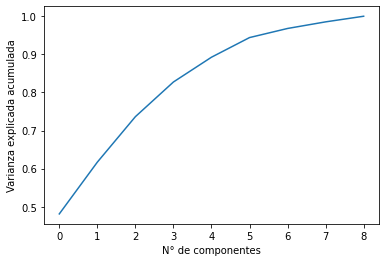

In [10]:
pca = PCA().fit(data_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('N° de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.show()

In [11]:
time_general =[]
start = time.time()
pca = PCA(n_components = 9)
pcs = pca.fit_transform(data_)
time_general.append(round(time.time() - start,2))
df_new = pd.DataFrame(data=pcs)
df_new.head()

,0,1,2,3,4,5,6,7,8
0,0.579511,-0.130082,0.113487,0.131309,-0.344117,0.138853,0.365406,0.049717,-0.039140
1,0.268899,-0.097885,-0.027600,0.018727,-0.126223,0.113876,0.228534,0.063964,0.000167
2,0.129356,-0.034493,-0.208316,0.149046,-0.011612,0.069820,0.275072,0.039260,-0.035530
3,0.333340,0.006686,-0.333036,0.368993,0.005482,0.087650,0.271973,0.017138,-0.024474
4,0.274801,0.015247,-0.318211,0.352567,0.001413,0.058093,0.208458,0.003243,-0.001819


In [12]:
time_general

[0.01]

In [13]:
# Calcular la varianza explicada por componentes principales
# print('Varianza de cada componente:', pca.explained_variance_ratio_)
print('\n (--)Varianza total explicada de 2 componentes:', round(sum(list(pca.explained_variance_ratio_[:2]))*100, 2))
print('\n (--)Varianza total explicada de 3 componentes:', round(sum(list(pca.explained_variance_ratio_[:3]))*100, 2))
print('\n Varianza total explicada de 4 componentes:', round(sum(list(pca.explained_variance_ratio_[:4]))*100, 2))
print('\n Varianza total explicada de 5 componentes:', round(sum(list(pca.explained_variance_ratio_[:5]))*100, 2))
print('\n (*)Varianza total explicada de 9 componentes:', round(sum(list(pca.explained_variance_ratio_))*100, 2))


 (--)Varianza total explicada de 2 componentes: 61.7

 (--)Varianza total explicada de 3 componentes: 73.63

 Varianza total explicada de 4 componentes: 82.74

 Varianza total explicada de 5 componentes: 89.25

 (*)Varianza total explicada de 9 componentes: 100.0


In [14]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labelss = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

fig = go.Figure(data=[go.Bar(
            x=labelss, y=per_var,
            text=per_var,
            textposition='auto',
        )])
fig.update_layout(
    title="Porcentaje de varianza por cada componente",
    xaxis_title="Componentes Principales",
    yaxis_title="Porcentaje de varianza explicada (%)",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple",
    )
)
    
fig.show()

# Aplicando PCA 3 componentes

In [15]:
start = time.time()
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data_)
print('Duration: {} seconds'.format(time.time() - start))
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

Duration: 0.04999423027038574 seconds


In [16]:
#Graficos
plot_2d (principalComponents [:, 0], principalComponents [:, 1])

In [17]:
plot_3d(principalComponents[:, 0],principalComponents[:, 1],principalComponents[:, 2])

In [18]:
principalComponents.shape

(15792, 3)

In [19]:
#Guardar Componentes
save(path+'pca_3.npy', principalComponents)